# HW02 (due October 12th)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [49]:
##Load the NLSY dataset
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import numpy as np

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')
data_labels = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta', iterator=True).variable_labels()

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

#  Summary statistics

Inspect the data.

In [17]:
##Visualize the dataset

data.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,0.0,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012


In [18]:
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215316,3.123836,36.559560,53.989328,1.674907
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652117,3.751409,9.869623,29.032325,0.478093
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


In [22]:
data_labels

{'idcode': 'NLS ID',
 'year': 'interview year',
 'birth_yr': 'birth year',
 'age': 'age in current year',
 'race': 'race',
 'msp': '1 if married, spouse present',
 'nev_mar': '1 if never married',
 'grade': 'current grade completed',
 'collgrad': '1 if college graduate',
 'not_smsa': '1 if not SMSA',
 'c_city': '1 if central city',
 'south': '1 if south',
 'ind_code': 'industry of employment',
 'occ_code': 'occupation',
 'union': '1 if union',
 'wks_ue': 'weeks unemployed last year',
 'ttl_exp': 'total work experience',
 'tenure': 'job tenure, in years',
 'hours': 'usual hours worked',
 'wks_work': 'weeks worked last year',
 'ln_wage': 'ln(wage/GNP deflator)'}

In [26]:
##tabulate college and union status 
data.collgrad.value_counts()


collgrad
0    23739
1     4795
Name: count, dtype: int64

In [25]:
data.union.value_counts()

union
0.0    14728
1.0     4510
Name: count, dtype: int64

In [27]:
##Drop missing observations

data_nomiss = data.dropna(subset=['collgrad', 'union'])

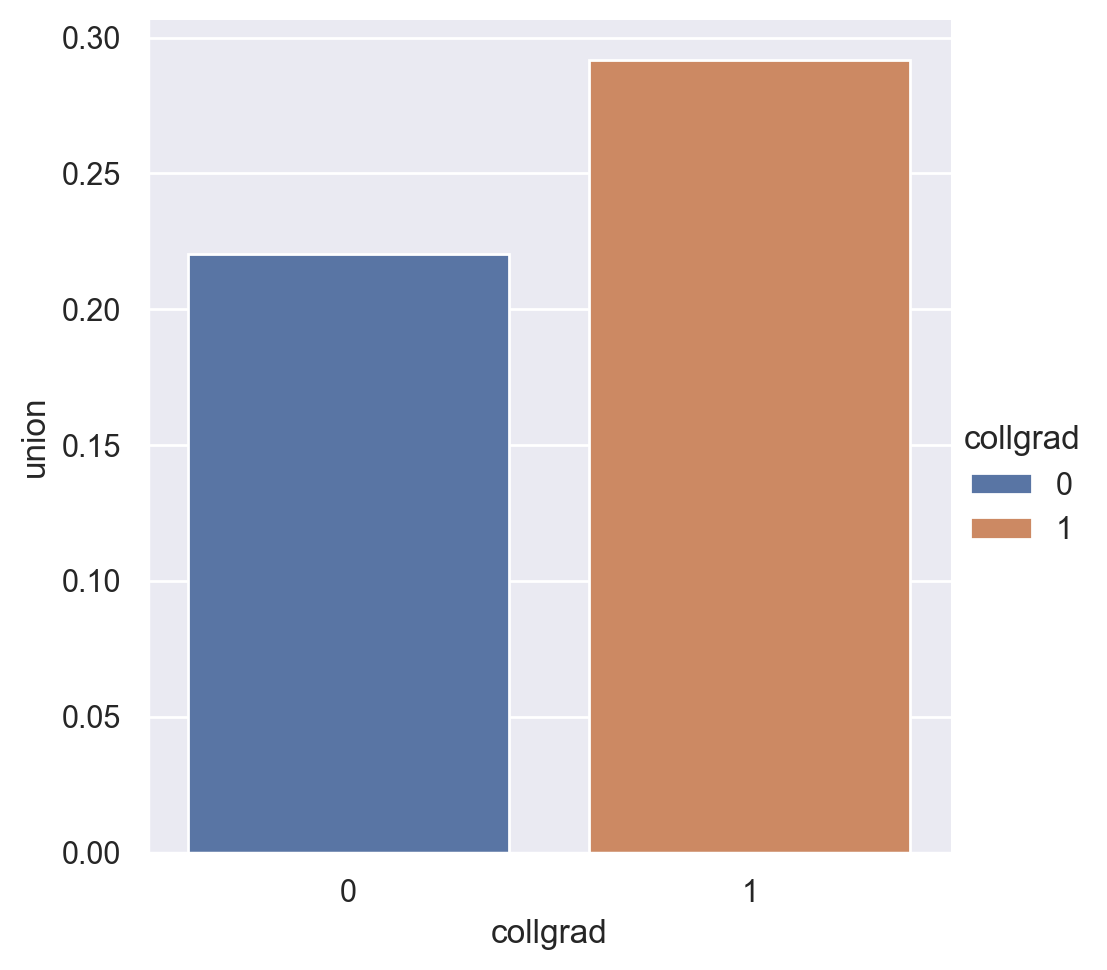

In [40]:
y = data_nomiss['union']
x = data_nomiss['collgrad']
sns.catplot(data = data_nomiss, x="collgrad", y="union", kind = 'bar', hue="collgrad",  ci=None)

<Axes: xlabel='union', ylabel='count'>

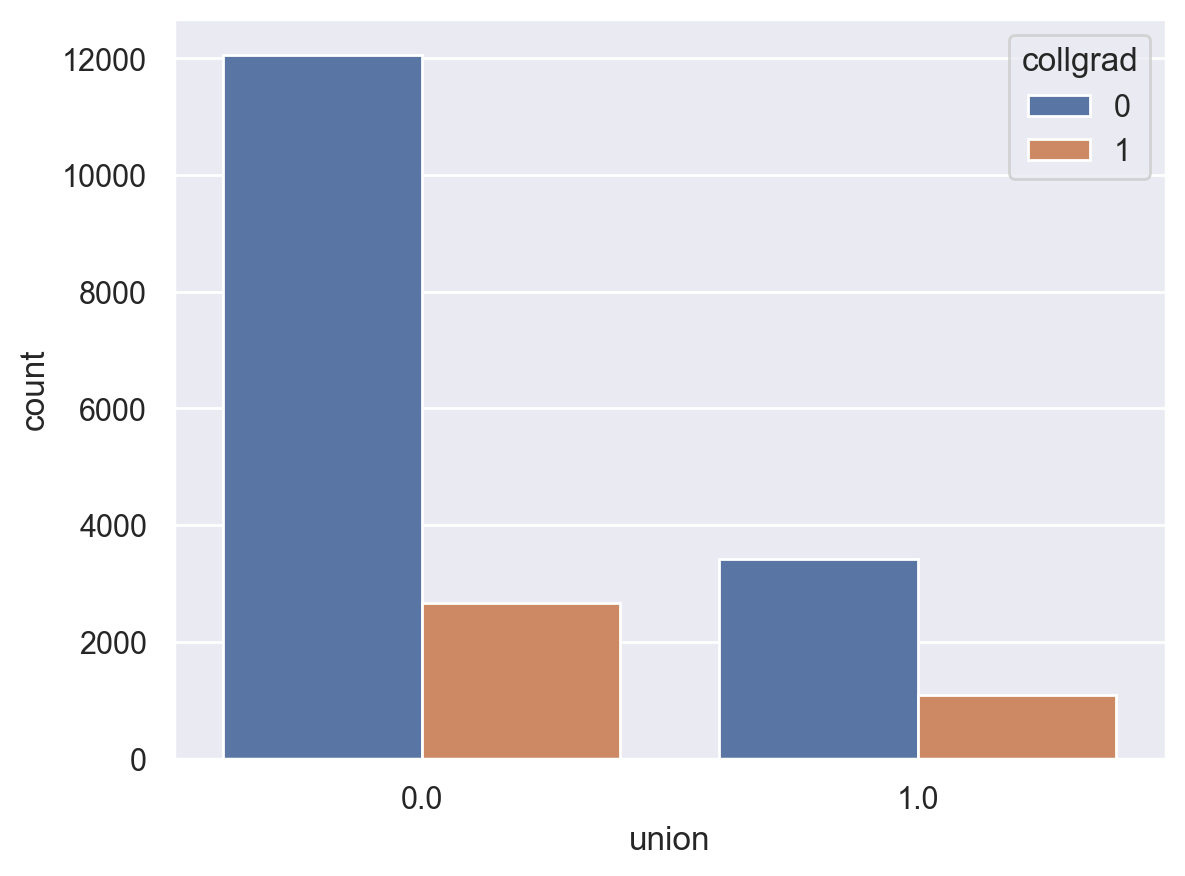

In [93]:
sns.countplot(data, x="union", hue="collgrad")

In [52]:
##generate a variable for log hours worked
h = data['hours']
u = data['union']


In [43]:
##Drop missing observations

data_nomissh = data.dropna(subset=['hours', 'union','year'])

<Axes: xlabel='year', ylabel='hours'>

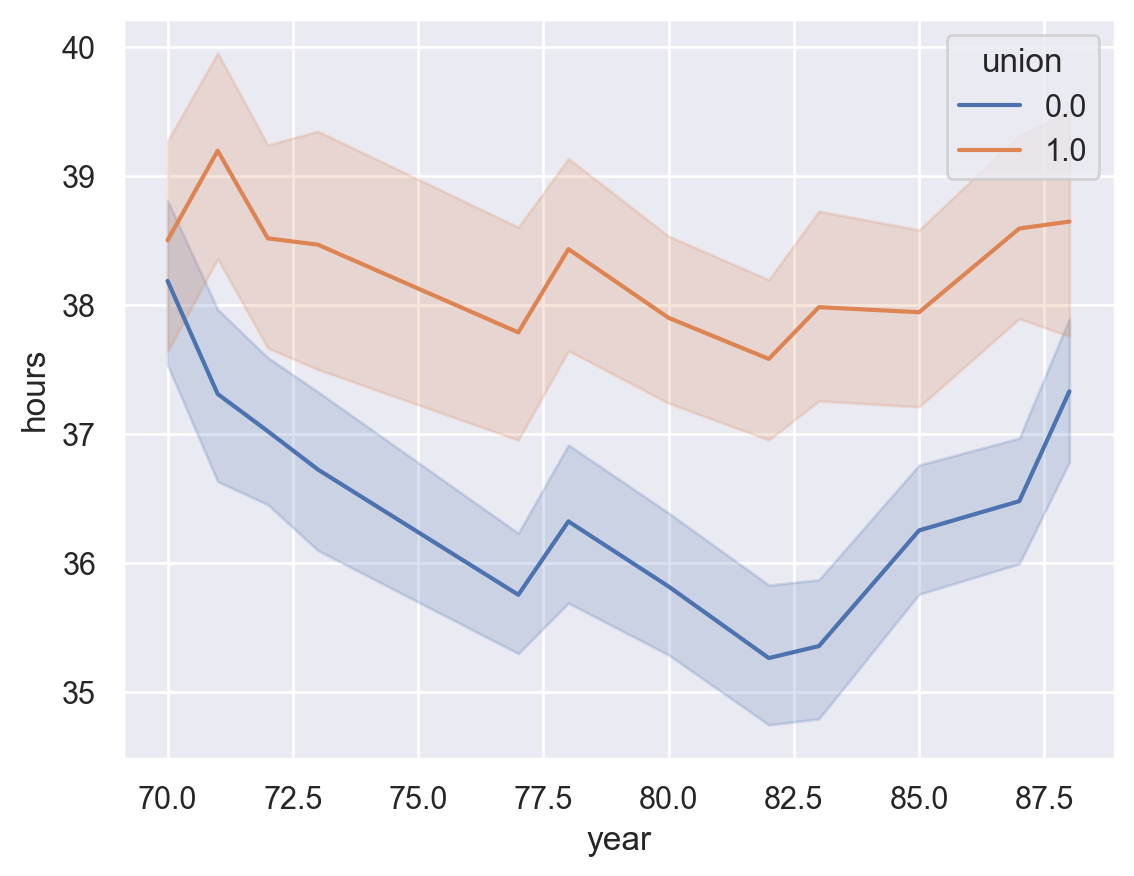

In [48]:
##plot log hours against year separately for union and non-union
import seaborn as sns
sns.lineplot(data=data_nomissh, x="year", y="hours", hue="union")

<Axes: xlabel='year', ylabel='hours'>

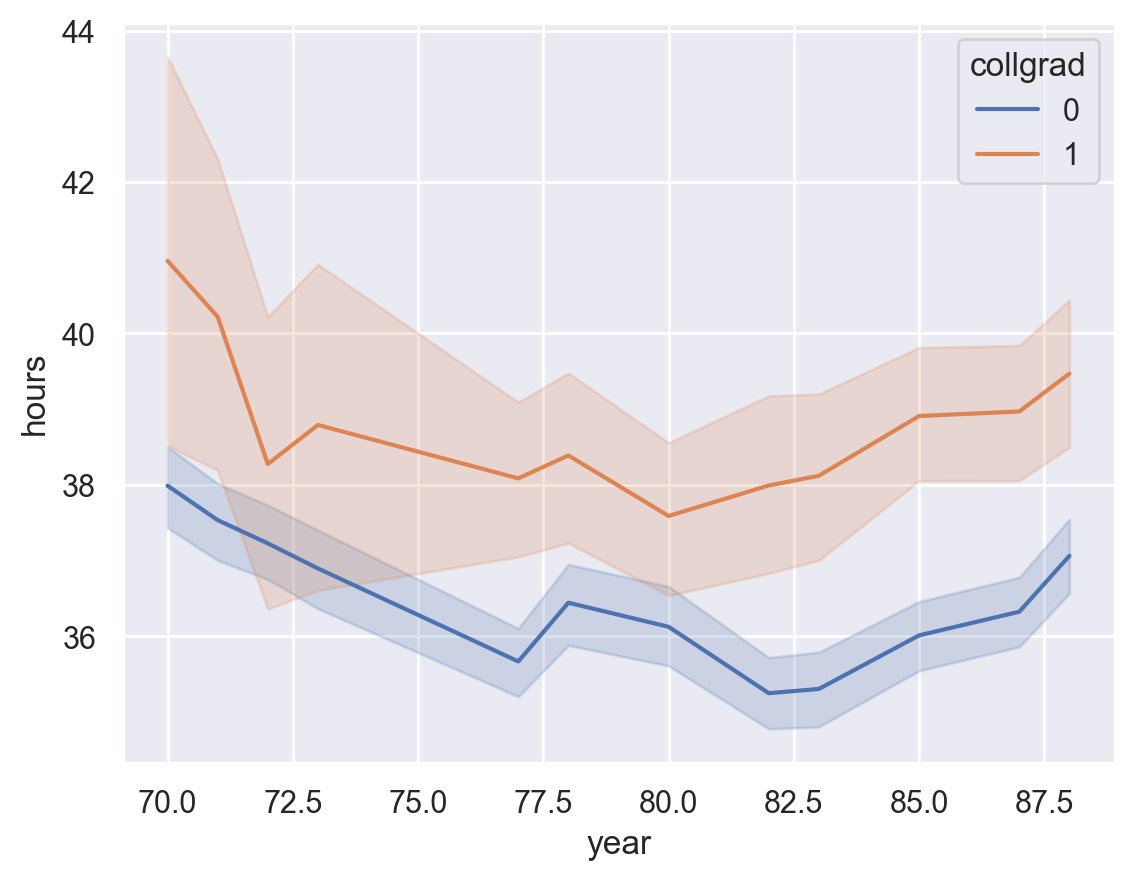

In [94]:
sns.lineplot(data=data_nomissh, x="year", y="hours", hue="collgrad")

<Axes: xlabel='year', ylabel='hours'>

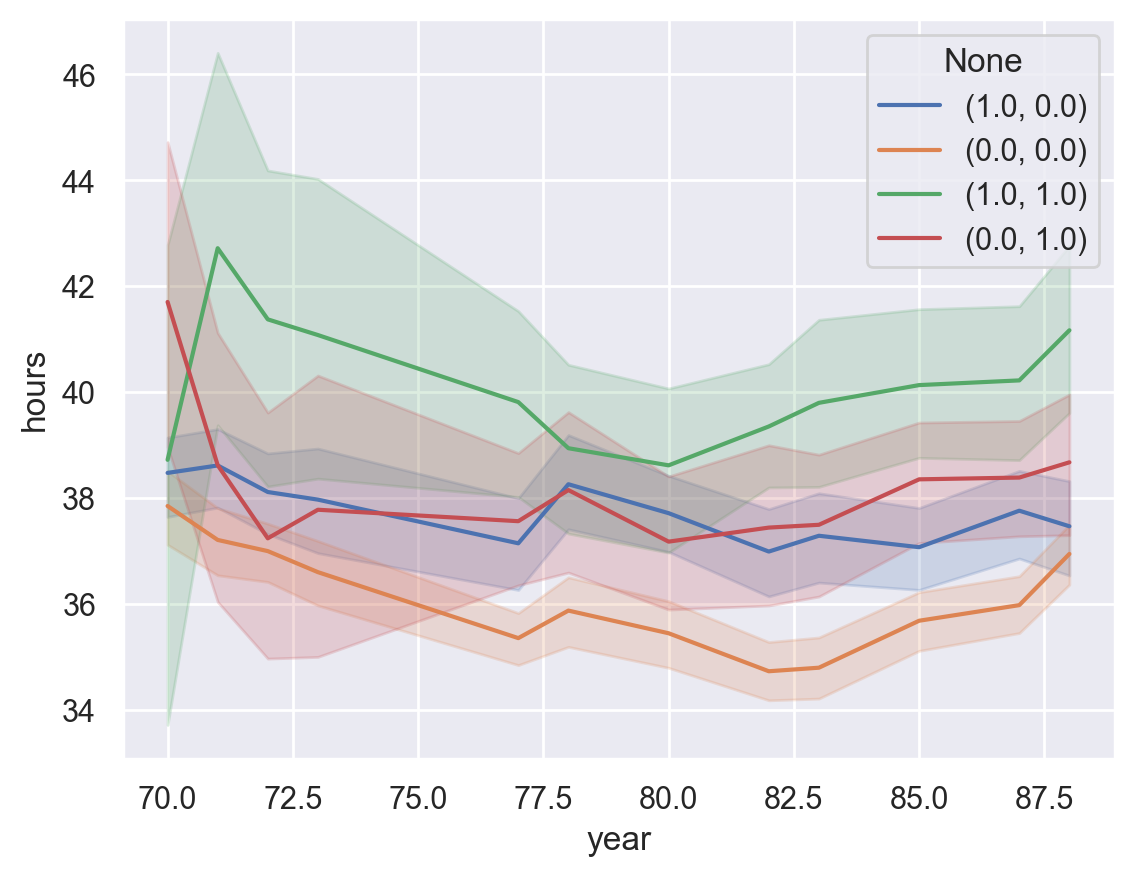

In [111]:
data_nomis3 = data.dropna(subset=['collgrad', 'union', 'year',"hours"])
sns.lineplot(data=data_nomis3, x="year", y="hours", hue=data_nomis3[['union', 'collgrad']].apply(tuple, axis=1))

<Axes: xlabel='year', ylabel='ln_wage'>

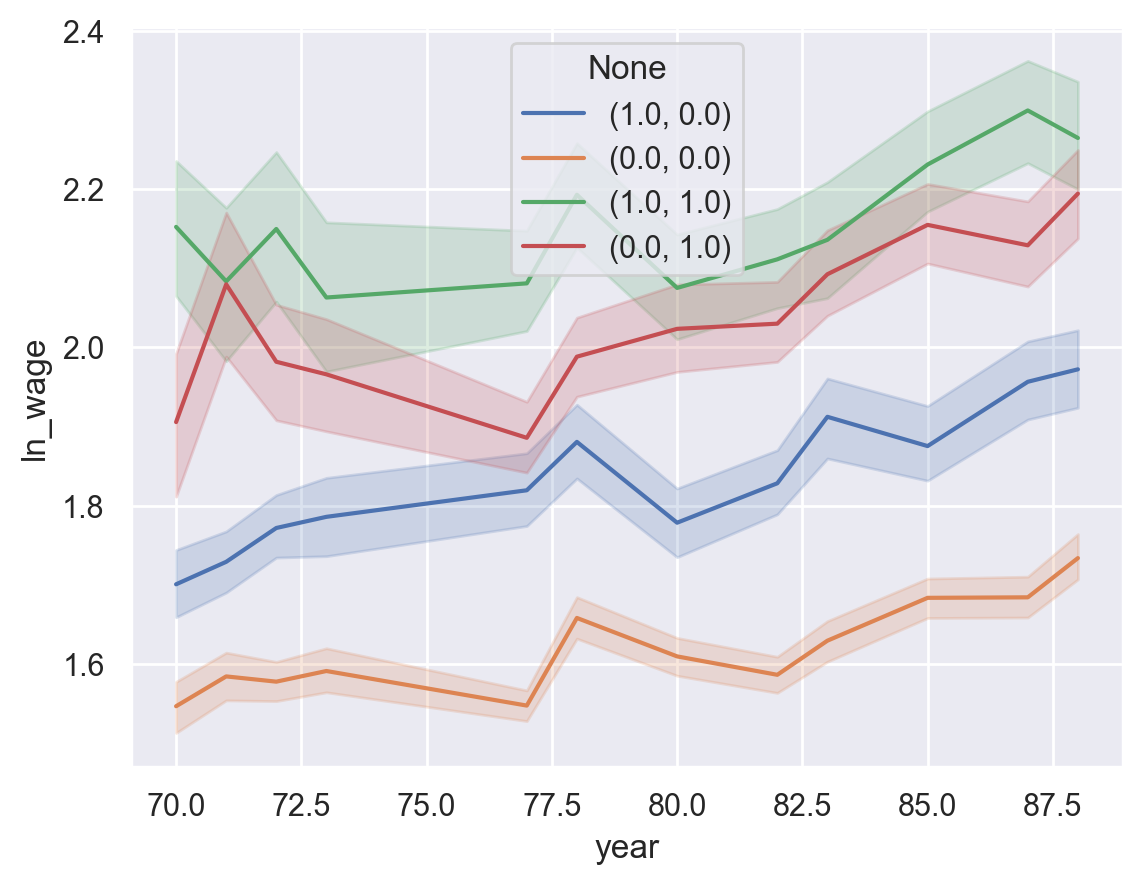

In [113]:
data_nomis4 = data.dropna(subset=['collgrad', 'union', 'year',"ln_wage"])
sns.lineplot(data=data_nomis3, x="year", y="ln_wage", hue=data_nomis3[['union', 'collgrad']].apply(tuple, axis=1))

<Axes: xlabel='grade', ylabel='ln_wage'>

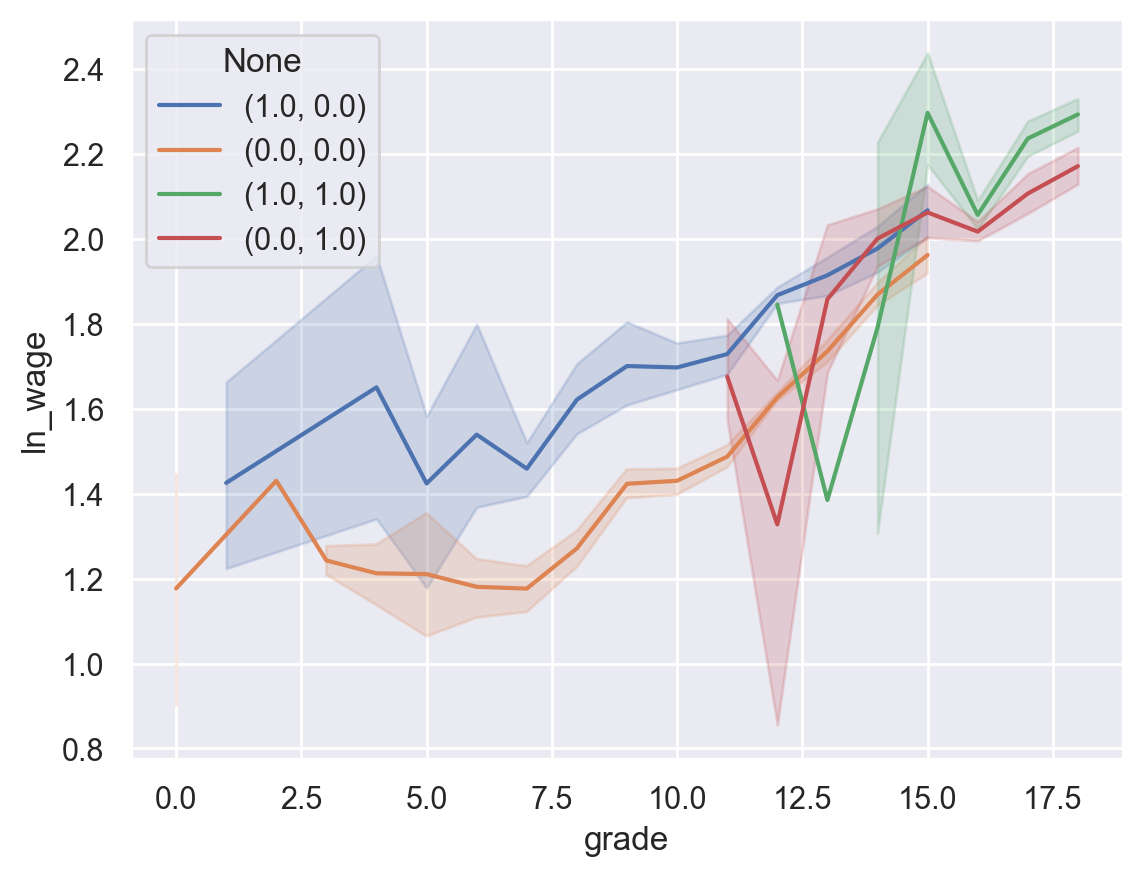

In [114]:
data_nomis5 = data.dropna(subset=['collgrad', 'union', 'grade',"ln_wage"])
sns.lineplot(data=data_nomis3, x="grade", y="ln_wage", hue=data_nomis3[['union', 'collgrad']].apply(tuple, axis=1))

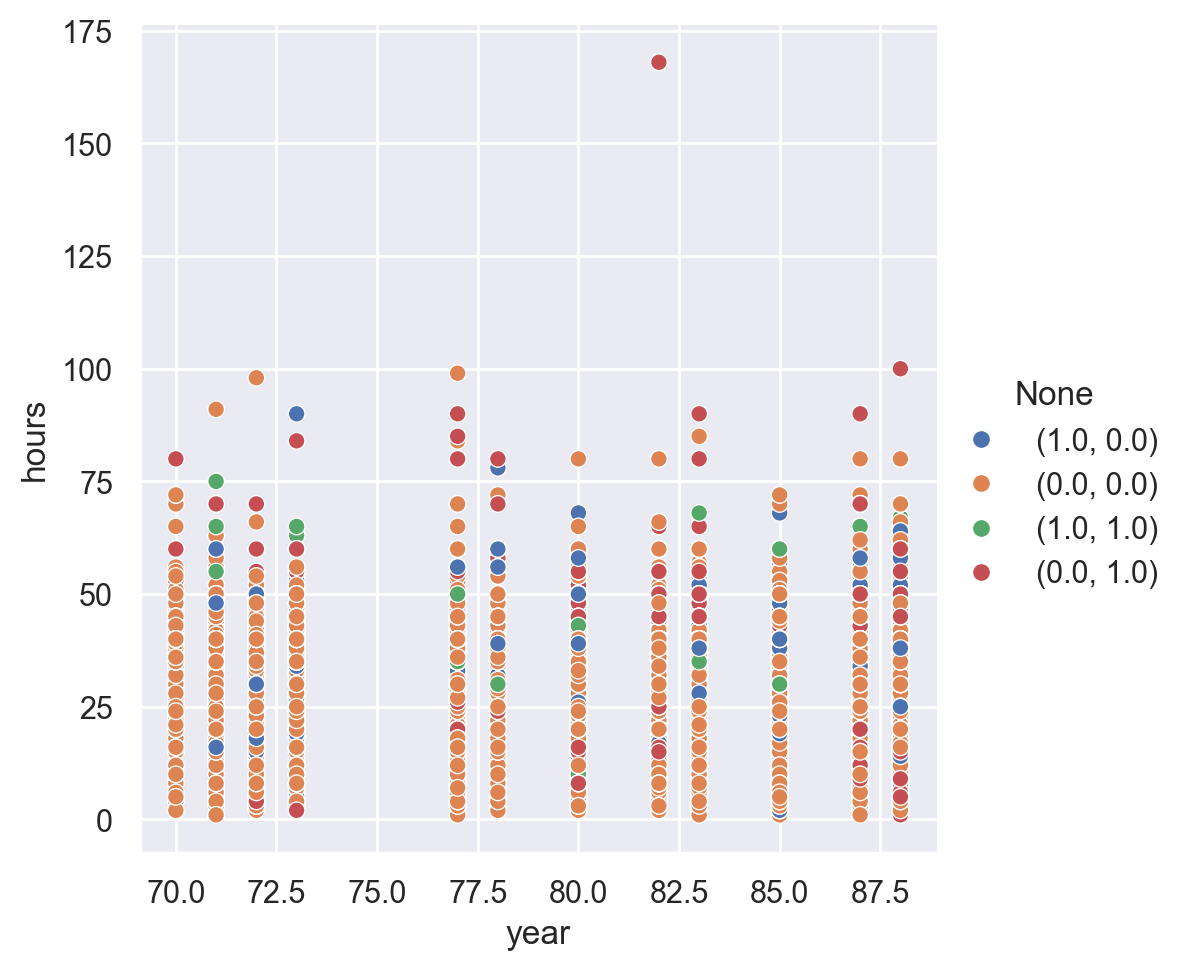

In [110]:
sns.relplot(x="year", y='hours', data=data_nomis3,
            hue=data_nomis3[['union', 'collgrad']].apply(tuple, axis=1))

# Regression: Effect of union status on hours worked

In [50]:
##Drop missing observations

data_nomissHU = data.dropna(subset=['hours', 'union'])

In [115]:
res0 = smf.ols("hours ~ collgrad", data=data).fit()
print(res0.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     132.7
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.25e-30
Time:                        23:39:07   Log-Likelihood:            -1.0550e+05
No. Observations:               28467   AIC:                         2.110e+05
Df Residuals:                   28465   BIC:                         2.110e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.2572      0.064    566.590      0.0

In [81]:
##Regress hours worked against union status and display the results

res = smf.ols("hours ~ union", data=data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     136.6
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           1.85e-31
Time:                        19:53:34   Log-Likelihood:                -70568.
No. Observations:               19202   AIC:                         1.411e+05
Df Residuals:                   19200   BIC:                         1.412e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3112      0.079    461.166      0.0

In [90]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval

#                coef    std err          t      P>|t|      [0.025      0.975]
#  union       1.9006      0.163     11.689      0.000       1.582       2.219

#### What is the identification assumption for the coefficient on union to be causal?





In [78]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
res2 = smf.ols("hours ~ union + collgrad", data=data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  hours   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     145.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.69e-63
Time:                        19:50:19   Log-Likelihood:                -70492.
No. Observations:               19202   AIC:                         1.410e+05
Df Residuals:                   19199   BIC:                         1.410e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9239      0.084    425.314      0.000      35.758      36.089
union          1.7661      0.162     10.880      0.000       1.448       2.084
collgrad       2.1420      0.173     12.353      0.000       1.802       2.482
==============================================================================
Omnibus:                     4212.730   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22770.233
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                       7.984   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
## add occupation codes to the regression and compare the results with the previous one
res3 = smf.ols("hours ~ union + occ_code", data=data).fit()
res3.summary()
print(summary_col([res,res2,res3]))


               hours I  hours II hours III
------------------------------------------
Intercept      36.3112  35.9239  36.5560  
               (0.0787) (0.0845) (0.1240) 
R-squared      0.0071   0.0149   0.0073   
R-squared Adj. 0.0070   0.0148   0.0072   
collgrad                2.1420            
                        (0.1734)          
occ_code                         -0.0548  
                                 (0.0220) 
union          1.9006   1.7661   1.9686   
               (0.1626) (0.1623) (0.1656) 
Standard errors in parentheses.


#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?


Occupation is not a confounder, meaning it only affects the treatment which in this case are the excessive working hours, consequently causing an effect on the decision of taking part in an union. 

#### What are "good controls" in the dataset in terms of being exogenous to union status?


In [ ]:
##add these controls to the regression


#### How do these change your estimates?


# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

[type your comments here, or attach as separate document.]